<a href="https://colab.research.google.com/github/saadatialirezam-create/bioinformatics-project/blob/main/HVstrips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
with open('/content/drive/MyDrive/brain_tumor_lists_V1.pkl', 'rb') as f:
    data = pickle.load(f)

notumor_imgs_resized_2x = data['notumor']
pituitary_imgs_resized_2x = data['pituitary']
meningioma_imgs_resized_2x = data['meningioma']
glioma_imgs_resized_2x = data['glioma']

In [3]:
import numpy as np
import gc

n_notumor    = len(notumor_imgs_resized_2x)
n_pituitary  = len(pituitary_imgs_resized_2x)
n_meningioma = len(meningioma_imgs_resized_2x)
n_glioma     = len(glioma_imgs_resized_2x)

total_imgs = []
labels = []

total_imgs.extend(notumor_imgs_resized_2x)
labels.extend([0] * n_notumor)

total_imgs.extend(pituitary_imgs_resized_2x)
labels.extend([1] * n_pituitary)

total_imgs.extend(meningioma_imgs_resized_2x)
labels.extend([2] * n_meningioma)

total_imgs.extend(glioma_imgs_resized_2x)
labels.extend([3] * n_glioma)

labels = np.array(labels, dtype=np.int64)

print(len(total_imgs), labels.shape)

del notumor_imgs_resized_2x
del meningioma_imgs_resized_2x
del pituitary_imgs_resized_2x
del glioma_imgs_resized_2x
gc.collect()

11424 (11424,)


172

In [4]:
total_imgs = np.asarray(total_imgs, dtype=np.uint8)
y = np.asarray(labels, dtype=np.int32)

In [6]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
    total_imgs, y,
    test_size=0.2,
    random_state=734,
    stratify=y
)

print("train_x:", train_x.shape, train_x.dtype)
print("test_x:", test_x.shape, test_x.dtype)

train_x: (9139, 224, 224, 3) uint8
test_x: (2285, 224, 224, 3) uint8


In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 4
IMG_SIZE = 224

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

hist = model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=30,
    batch_size=32,
    verbose=2
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 4)              │     4,054,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/30
286/286 - 187s - 655ms/step - accuracy: 0.5284 - loss: 1.1548 - val_accuracy: 0.2551 - val_loss: 2.4960
Epoch 2/30
286/286 - 85s - 297ms/step - accuracy: 0.6485 - loss: 0.9055 - val_accuracy: 0.2551 - val_loss: 3.6073
Epoch 3/30
286/286 - 36s - 124ms/step - accuracy: 0.7144 - loss: 0.7526 - val_accuracy: 0.7295 - val_loss: 0.7364
Epoch 4/30
286/286 - 35s - 123ms/step - accuracy: 0.7558 - loss: 0.6781 - val_accuracy: 0.6923 - val_loss: 0.7739
Epoch 5/30
286/286 - 35s - 123ms/step - accuracy: 0.7890 - loss: 0.5840 - val_accuracy: 0.8206 - val_loss: 0.4462
Epoch 6/30
286/286 - 35s - 124ms/step - accuracy: 0.8095 - loss: 0.5284 - val_accuracy: 0.8254 - val_loss: 0.4422
Epoch 7/30
286/286 - 35s - 123ms/step - accuracy: 0.8382 - loss: 0.4356 - val_accuracy: 0.8341 - val_loss: 0.4144
Epoch 8/30
286/286 - 36s - 124ms/step - accuracy: 0.8576 - loss: 0.3952 - val_accuracy: 0.8053 - val_loss: 0.5019
Epoch 9/30
286/286 - 35s - 123ms/step - accuracy: 0.8838 - loss: 0.3128 - val_accuracy:

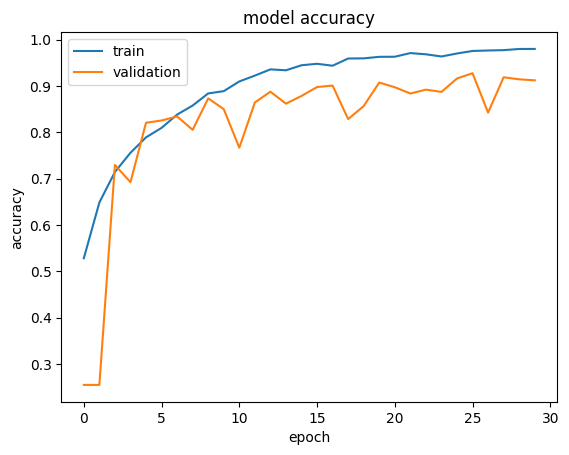

In [8]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)

In [10]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9212 - loss: 0.3233
Loss = 0.3483579158782959
Test Accuracy = 0.9120349884033203
